In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl
import seaborn as sns
sns.set_theme('talk', palette=sns.color_palette('Set2'))
import time
pd.options.display.max_columns = 30
pd.options.display.max_colwidth = 150

## train data load

In [2]:
infile = open('..//4_data_preparation_for_training//X_train','rb')
X_train = pkl.load(infile)
infile.close()

infile = open('..//4_data_preparation_for_training//X_test','rb')
X_test = pkl.load(infile)
infile.close()

infile = open('..//4_data_preparation_for_training//y_train','rb')
y_train = pkl.load(infile)
infile.close()

infile = open('..//4_data_preparation_for_training//y_test','rb')
y_test = pkl.load(infile)
infile.close()

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

## random forest regressor and grid search

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [4]:
parameters = [{'n_estimators':[30,40,50]}]

In [5]:
grid_search = GridSearchCV(estimator = RandomForestRegressor(),
                           param_grid = parameters,
                           cv = 3,
#                            n_jobs = -1,
                          )

In [6]:
start = time.time()

grid_search = grid_search.fit(X_train, y_train)

stop = time.time()
print(round((stop-start)/60,1),'min.')

6.6 min.


In [7]:
grid_search.best_score_

0.8021154397242004

In [8]:
grid_search.best_params_

{'n_estimators': 50}

In [9]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,24.547638,0.677470,0.117476,0.013415,30,{'n_estimators': 30},0.801985,0.798813,0.798656,0.799818,0.001534,3
1,32.619486,0.421200,0.155731,0.009839,40,{'n_estimators': 40},0.804038,0.798561,0.798868,0.800489,0.002513,2
2,40.912496,0.856431,0.185758,0.011476,50,{'n_estimators': 50},0.804449,0.800256,0.801642,0.802115,0.001744,1


In [10]:
start = time.time()

model = RandomForestRegressor(n_estimators = 30, random_state = 0)
model.fit(X_train, y_train)

stop = time.time()
print(round((stop-start)/60,1),'min.')

1.0 min.


## model evaluation

In [11]:
from sklearn.metrics import r2_score

In [12]:
predictions = model.predict(X_test)

In [13]:
r2_score(y_test,predictions)

0.8287725615653264

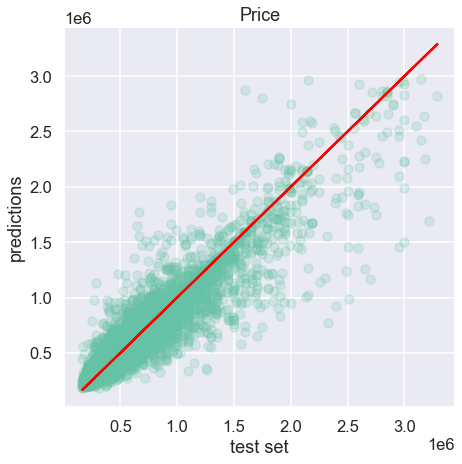

In [14]:
plt.figure(figsize=(7,7))
# plt.xlim(0,500)
# plt.ylim(0,500)

# Our predictions
plt.scatter(x=y_test, y=predictions, edgecolor=None, alpha=0.2)
plt.xlabel('test set')
plt.ylabel('predictions')
plt.title('Price')

# Perfect predictions
plt.plot(y_test, y_test ,'r')

In [15]:
errors = y_test - predictions

Text(0.5, 1.0, 'Error distribution')

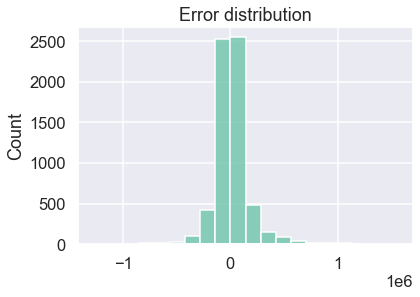

In [16]:
# plt.xlim(-200000,200000)

sns.histplot(errors, bins=20)
plt.title('Error distribution')

Text(0.5, 1.0, 'Errors boxplot')

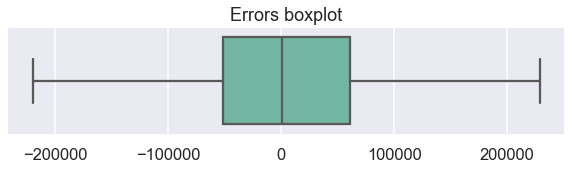

In [17]:
plt.figure(figsize=(10,2))
sns.boxplot(x=errors, showfliers=False)
plt.title('Errors boxplot')

In [18]:
predictions

array([824706.83333333, 503823.49206349, 596233.33333333, ...,
       624615.55555556, 648659.63333333, 552728.1       ])

In [19]:
predictions[:20]/y_test[:20]

array([0.91736022, 1.69068286, 0.85420248, 1.04296865, 1.3769108 ,
       0.96830089, 1.05685488, 0.97678788, 0.97451515, 0.95552178,
       1.00439663, 0.78394457, 0.96240698, 1.47406196, 1.14587814,
       0.81531737, 1.44157575, 1.01432125, 0.88948718, 0.88561905])

## k-Fold Cross Validation

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
start = time.time()

accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)

stop = time.time()
print(round((stop-start)/60,1),'min.')

2.6 min.


In [22]:
accuracies.mean()

0.8087695430630781

In [23]:
accuracies.std()

0.008102682057321958

In [24]:
accuracies

array([0.81506076, 0.7973703 , 0.81154372, 0.80132468, 0.81854825])

## saving data

In [25]:
import joblib
joblib.dump(model, 'random_forest_model')

['random_forest_model']